In \[1\]:

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sb

    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    #from xgboost import XGBClassifier
    from sklearn import metrics

    import warnings
    warnings.filterwarnings('ignore')

In \[2\]:

    df = pd.read_csv("C:/Users/Dell/Downloads/Google_Stock_Price_Train.csv")
    df.head()

Out\[2\]:

|     | Date       | Open   | High   | Low    | Close  | Volume      |
|-----|------------|--------|--------|--------|--------|-------------|
| 0   | 01-03-2012 | 325.25 | 332.83 | 324.97 | 663.59 | 73,80,500   |
| 1   | 01-04-2012 | 331.27 | 333.87 | 329.08 | 666.45 | 57,49,400   |
| 2   | 01-05-2012 | 329.83 | 330.75 | 326.89 | 657.21 | 65,90,300   |
| 3   | 01-06-2012 | 328.34 | 328.77 | 323.68 | 648.24 | 54,05,900   |
| 4   | 01-09-2012 | 322.04 | 322.29 | 309.46 | 620.76 | 1,16,88,800 |

In \[5\]:

    df.shape

Out\[5\]:

    (1258, 6)

In \[6\]:

    df.describe()

Out\[6\]:

|       | Open        | High        | Low         |
|-------|-------------|-------------|-------------|
| count | 1258.000000 | 1258.000000 | 1258.000000 |
| mean  | 533.709833  | 537.880223  | 529.007409  |
| std   | 151.904442  | 153.008811  | 150.552807  |
| min   | 279.120000  | 281.210000  | 277.220000  |
| 25%   | 404.115000  | 406.765000  | 401.765000  |
| 50%   | 537.470000  | 540.750000  | 532.990000  |
| 75%   | 654.922500  | 662.587500  | 644.800000  |
| max   | 816.680000  | 816.680000  | 805.140000  |

In \[7\]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 1258 entries, 0 to 1257
    Data columns (total 6 columns):
     #   Column  Non-Null Count  Dtype  
    ---  ------  --------------  -----  
     0   Date    1258 non-null   object 
     1   Open    1258 non-null   float64
     2   High    1258 non-null   float64
     3   Low     1258 non-null   float64
     4   Close   1258 non-null   object 
     5   Volume  1258 non-null   object 
    dtypes: float64(3), object(3)
    memory usage: 59.1+ KB

In \[8\]:

    plt.figure(figsize=(15,5))
    plt.plot(df['Open'])
    plt.title('Tesla Close price.', fontsize=15)
    plt.ylabel('Price in dollars.')
    plt.show()

![](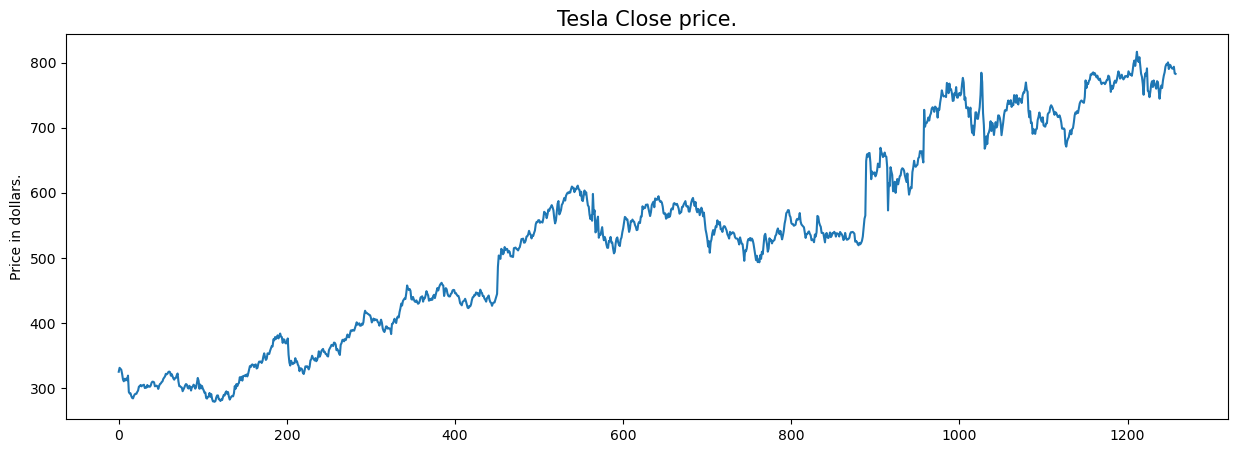%0A)

In \[9\]:

    df.head()

Out\[9\]:

|     | Date       | Open   | High   | Low    | Close  | Volume      |
|-----|------------|--------|--------|--------|--------|-------------|
| 0   | 01-03-2012 | 325.25 | 332.83 | 324.97 | 663.59 | 73,80,500   |
| 1   | 01-04-2012 | 331.27 | 333.87 | 329.08 | 666.45 | 57,49,400   |
| 2   | 01-05-2012 | 329.83 | 330.75 | 326.89 | 657.21 | 65,90,300   |
| 3   | 01-06-2012 | 328.34 | 328.77 | 323.68 | 648.24 | 54,05,900   |
| 4   | 01-09-2012 | 322.04 | 322.29 | 309.46 | 620.76 | 1,16,88,800 |

In \[10\]:

    df[df['Open'] == df['High']].shape

Out\[10\]:

    (32, 6)

In \[11\]:

    df.isnull().sum()

Out\[11\]:

    Date      0
    Open      0
    High      0
    Low       0
    Close     0
    Volume    0
    dtype: int64

In \[12\]:

    features = ['Open', 'High', 'Low']
    plt.subplots(figsize=(20,10))
    for i, col in enumerate(features):
        plt.subplot(2,3,i+1)
        sb.distplot(df[col])
        plt.show()

![](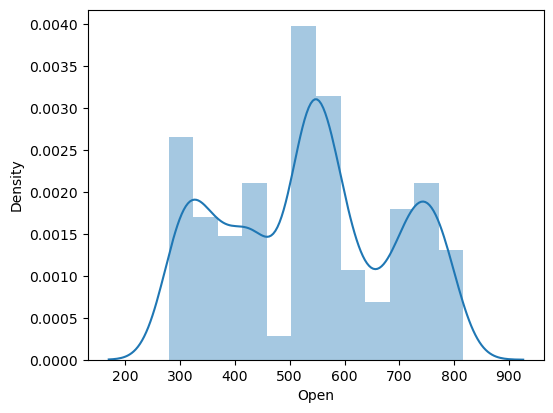%0A)

![](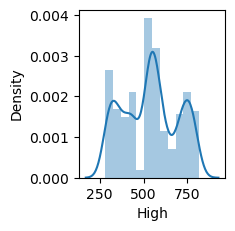%0A)

![](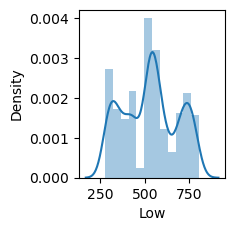%0A)

In \[13\]:

    plt.subplots(figsize=(20,10))
    for i, col in enumerate(features):
        plt.subplot(2,3,i+1)
        sb.boxplot(df[col])
        plt.show()

![](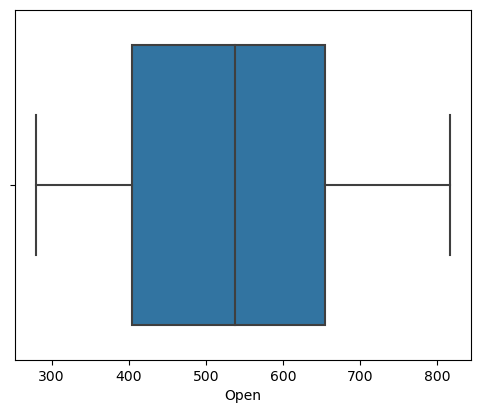%0A)

![](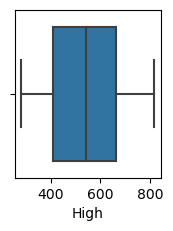%0A)

![](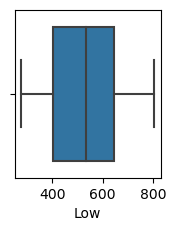%0A)

In \[6\]:

    features = df[['Close', 'High', 'Low']]
    target = df['High']

    #scaler = StandardScaler()
    #features = scaler.fit_transform(features)

    X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022)
    print(X_train.shape, X_valid.shape)

    (1132, 3) (126, 3)

In \[ \]:

     

In \[10\]:

    splitted = df['Date'].str.split('/', expand=True)

    df['day'] = splitted[1].astype('str')
    df['month'] = splitted[0].astype('str')
    df['year'] = splitted[2].astype('str')

    df.head()

Out\[10\]:

|     | Date       | Open   | High   | Low    | Close  | Volume      | day  | month      | year |
|-----|------------|--------|--------|--------|--------|-------------|------|------------|------|
| 0   | 01-03-2012 | 325.25 | 332.83 | 324.97 | 663.59 | 73,80,500   | None | 01-03-2012 | None |
| 1   | 01-04-2012 | 331.27 | 333.87 | 329.08 | 666.45 | 57,49,400   | None | 01-04-2012 | None |
| 2   | 01-05-2012 | 329.83 | 330.75 | 326.89 | 657.21 | 65,90,300   | None | 01-05-2012 | None |
| 3   | 01-06-2012 | 328.34 | 328.77 | 323.68 | 648.24 | 54,05,900   | None | 01-06-2012 | None |
| 4   | 01-09-2012 | 322.04 | 322.29 | 309.46 | 620.76 | 1,16,88,800 | None | 01-09-2012 | None |

In \[ \]:

     

In \[13\]:

    data_grouped = df.groupby('year').mean()
    plt.subplots(figsize=(20,10))

    for i, col in enumerate(['Open', 'High', 'Low']):
        plt.subplot(2,2,i+1)
        data_grouped[col].plot.bar()
        plt.show()

![](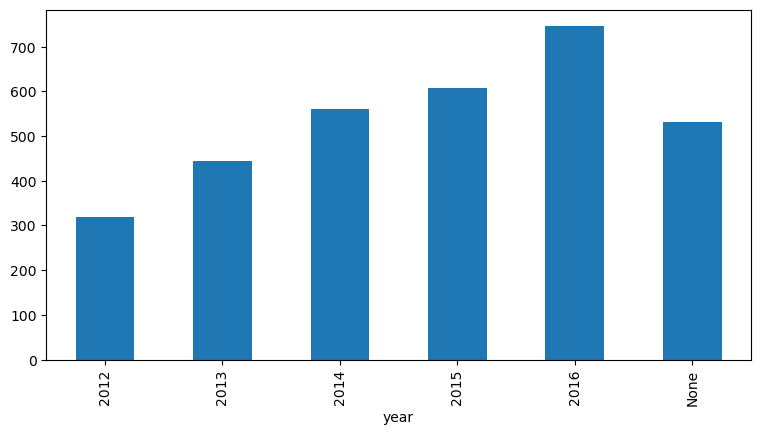%0A)

![](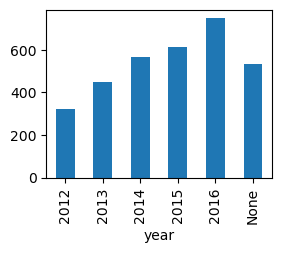%0A)

![](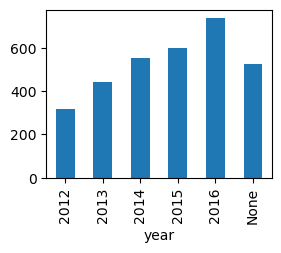%0A)

In \[17\]:

    plt.figure(figsize=(10, 10))

    # As our concern is with the highly
    # correlated features only so, we will visualize
    # our heatmap as per that criteria only.
    sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
    plt.show()

![](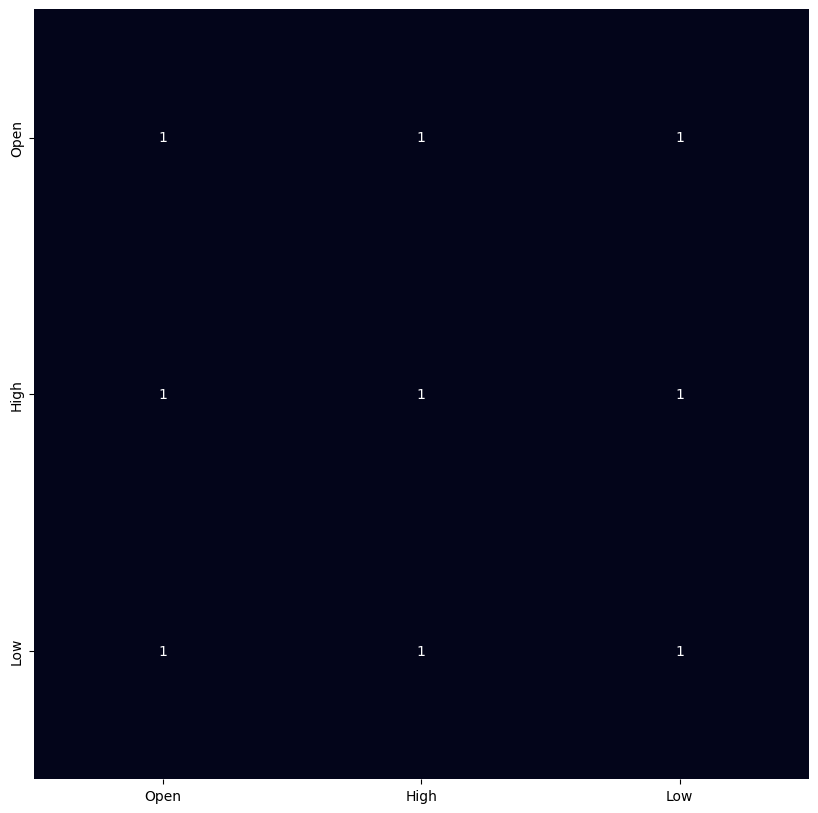%0A)

In \[ \]:

    Conclusion:
    We can observe that the accuracy achieved by the state-of-the-art 
    ML model is no better than simply guessing with a probability of 50%. 
    Possible reasons for this may be the lack of data or using a very simple model 
    to perform such a complex task as Stock Market prediction.

In \[ \]: